# Regressão III - Tarefa

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.interpolate import interp1d
from statsmodels.nonparametric.smoothers_lowess import lowess

In [5]:
df = pd.read_csv('/content/previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0.0,Empresário,Superior completo,Casado,Casa,47.0,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0.0,Assalariado,Superior incompleto,Casado,Casa,30.0,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0.0,Assalariado,Superior completo,Casado,Casa,28.0,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2.0,Assalariado,Médio,Casado,Casa,44.0,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2.0,Assalariado,Superior completo,Casado,Casa,33.0,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [12]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [14]:
df.index = pd.to_datetime(df.index)

In [22]:
df.index.value_counts()
# Não entendi, como vou separar os últimos três meses se só tem 2?

data_ref
2015-01-01    50000
2015-02-01     7743
Name: count, dtype: int64

In [32]:
meses = df.index.month.unique()[-3:]
holdout = df[df.index.month.isin(meses)]

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [53]:
base = holdout.reset_index().drop(columns=['data_ref', 'index'])
base = pd.get_dummies(base).astype(float)
X = base.drop(columns=['renda'])
y = base['renda']

In [55]:
X = sm.add_constant(X)

In [56]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     1190.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        12:47:43   Log-Likelihood:            -6.6515e+05
No. Observations:               57743   AIC:                         1.330e+06
Df Residuals:                   57717   BIC:                         1.331e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.753e+04   2.46e+04     -0.711      0.477   -6.58e+04    3.08e+04
qtd_filhos                     -602.9501   2089.741     -0.289      0.773   -4698.853    3492.953
idade                           126.6723     13.295      9.528      0.000     100.613     152.731
tempo_emprego                  2741.2675     17.784    154.146      0.000    2706.411    2776.124
qt_pessoas_residencia           285.8916   2084.873      0.137      0.891   -3800.471    4372.254
sexo_F                          111.1691   5383.781      0.021      0.984   -1.04e+04    1.07e+04
sexo_M                         -619.4498   5384.248     -0.115      0.908   -1.12e+04    9933.703
posse_de_veiculo_N               -5.4630   5383.783     -0.001      0.999   -1.06e+04    1.05e+04
posse_de_veiculo_S             -502.8177   5383.989     -0.093      0.926   -1.11e+04       1e+04
posse_de_imovel_N             -1528.7141   5383.921     -0.284      0.776   -1.21e+04    9023.799
posse_de_imovel_S              1020.4335   5383.733      0.190      0.850   -9531.711    1.16e+04
tipo_renda_Assalariado         4578.8106   2333.433      1.962      0.050       5.269    9152.352
tipo_renda_Bolsista           -1.015e+04   4532.022     -2.240      0.025    -1.9e+04   -1268.041
tipo_renda_Empresário          5419.4980   2336.742      2.319      0.020     839.473    9999.523
tipo_renda_Pensionista        -4434.8437   2344.024     -1.892      0.058   -9029.142     159.455
tipo_renda_Servidor público    4079.0824   2346.551      1.738      0.082    -520.169    8678.334
educacao_Fundamental          -1064.1007   2363.271     -0.450      0.653   -5696.125    3567.923
educacao_Médio                -2267.1570   2249.748     -1.008      0.314   -6676.675    2142.361
educacao_Pós graduação         2038.5794   3509.502      0.581      0.561   -4840.063    8917.221
educacao_Superior completo     -129.3839   2252.358     -0.057      0.954   -4544.017    4285.250
educacao_Superior incompleto    913.7815   2285.208      0.400      0.689   -3565.238    5392.801
estado_civil_Casado           -1476.1716   2459.878     -0.600      0.548   -6297.544    3345.201
estado_civil_Separado          -149.5971   2363.750     -0.063      0.950   -4782.559    4483.364
estado_civil_Solteiro          2423.0450   2345.149      1.033      0.302   -2173.459    7019.549
estado_civil_União             -325.1935   2473.719     -0.131      0.895   -5173.696    4523.309
estado_civil_Viúvo             -980.3634   2375.604     -0.413      0.680   -5636.559    3675.832
tipo_residencia_Aluguel         -63.5096   1960.730     -0.032      0.974   -3906.550    3779.531
tipo_residencia_Casa           -759.9040   1830.962     -0.415      0.678   -4348.598    2828.790
tipo_residencia_Com os pais     502.8603   18

In [58]:
f'R² -Ajustado {model.rsquared_adj}'

'R² -Ajustado 0.3397823646894633'

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [62]:
holdout['quartil'] = pd.qcut(holdout['tempo_emprego'], q=20, labels=False, duplicates='drop')

In [63]:
holdout['log_renda'] = np.log(holdout['renda'])

In [66]:
perfil = holdout.groupby('quartil').agg(
    count=('tempo_emprego', 'size'),
    mean_log_renda=('log_renda', 'mean'),
    mean_tempo_emprego=('tempo_emprego', 'mean')
).reset_index()

In [67]:
perfil

,quartil,count,mean_log_renda,mean_tempo_emprego
0,0,2918,7.424699,0.512648
1,1,2882,7.551421,1.118268
2,2,2869,7.636885,1.785438
3,3,2880,7.696296,2.520899
4,4,2904,7.819946,3.312655
5,5,2888,7.928708,4.008282
6,6,2924,7.978786,4.647600
7,7,2841,8.130185,5.407669
8,8,2909,8.193716,6.244613
9,9,2903,8.305173,7.051512


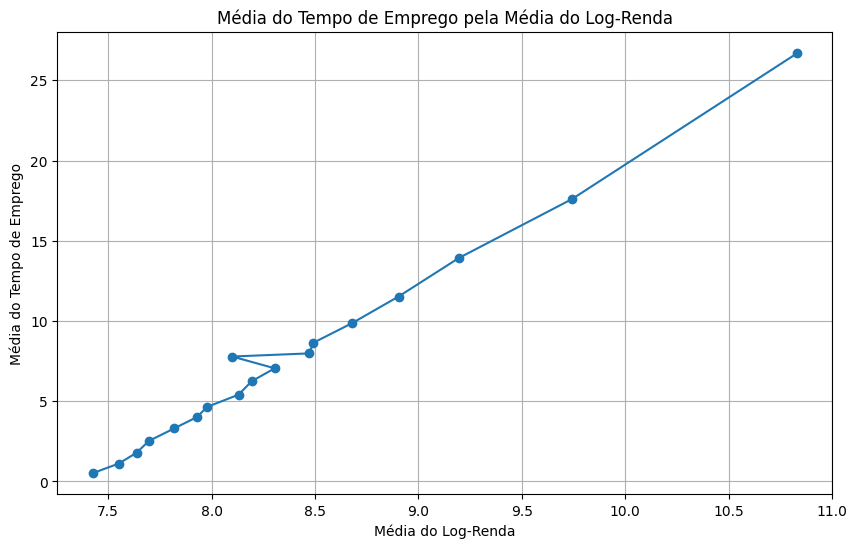

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(perfil['mean_log_renda'], perfil['mean_tempo_emprego'], marker='o', linestyle='-')
plt.xlabel('Média do Log-Renda')
plt.ylabel('Média do Tempo de Emprego')
plt.title('Média do Tempo de Emprego pela Média do Log-Renda')
plt.grid(True)
plt.show()

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [131]:
def get_r2(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.rsquared_adj

base2 = base.copy()
r2 = {}

In [132]:
base2['log_renda'] = np.log(base2['renda'])
X = base2.drop(columns=['renda', 'log_renda'])
y = base2['log_renda']
r2['Sem Transformação'] = get_r2(X, y)

In [133]:
base2['log_tempo_emprego'] = np.log(base2['tempo_emprego'] + 1)
X = base2.drop(columns=['renda', 'log_renda', 'tempo_emprego'])
r2['Transformação Log'] = get_r2(X, y)

In [134]:
lw = lowess(endog=base2['log_renda'], exog=base2['tempo_emprego'], frac=0.2)
base2['lowess_tempo_emprego'] = lw[:, 1]

X = base2.drop(columns=['renda', 'tempo_emprego'])
r2['Transformação Lowess'] = get_r2(X, y)

In [135]:
r2

{'Sem Transformação': 0.559993870778754,
 'Transformação Log': 0.4757030880447358,
 'Transformação Lowess': 1.0}

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [99]:
from sklearn.model_selection import train_test_split

In [138]:
def r2(X_train, y_train, X_test, y_test):
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train).fit()
    X_test = sm.add_constant(X_test)
    y_pred = model.predict(X_test)
    return model.rsquared_adj, sm.OLS(y_test, y_pred).fit().rsquared_adj


r2_teste = {}

In [139]:
base_sem_transformacao = base.copy()
base_sem_transformacao['log_renda'] = np.log(base_sem_transformacao['renda'])
train_df, test_df = train_test_split(base_sem_transformacao, test_size=0.2, random_state=42)

X_test = test_df.drop(columns=['renda', 'log_renda'])
y_test = test_df['log_renda']

X_train = train_df.drop(columns=['renda', 'log_renda'])
y_train = train_df['log_renda']

train_r2, test_r2 = r2(X_train, y_train, X_test, y_test)
r2_teste['Sem transformação'] = test_r2

In [140]:
base_transformacao_log = base.copy()
base_transformacao_log['log_tempo_emprego'] = np.log(base_transformacao_log['tempo_emprego'] + 1)
base_transformacao_log['log_renda'] = np.log(base_transformacao_log['renda'])

train_df, test_df = train_test_split(base_transformacao_log, test_size=0.2, random_state=42)

X_test = test_df.drop(columns=['renda', 'log_renda', 'tempo_emprego'])
y_test = test_df['log_renda']

X_train = train_df.drop(columns=['renda', 'log_renda', 'tempo_emprego'])
y_train = train_df['log_renda']

train_r2, test_r2 = r2(X_train, y_train, X_test, y_test)
r2_teste['Transformação Log'] = test_r2

In [151]:
base_transformacao_lowess = base.copy()
base_transformacao_lowess['log_renda'] = np.log(base_transformacao_lowess['renda'])

lw = lowess(endog=base_transformacao_lowess['log_renda'], exog=base_transformacao_lowess['tempo_emprego'], frac=0.2)
base_transformacao_lowess['lowess_tempo_emprego'] = lw[:, 1]

train_df, test_df = train_test_split(base_transformacao_lowess, test_size=0.2, random_state=42)

X_test = test_df.drop(columns=['renda', 'log_renda', 'tempo_emprego'])
y_test = test_df['log_renda']

X_train = train_df.drop(columns=['renda', 'log_renda', 'tempo_emprego'])
y_train = train_df['log_renda']

train_r2, test_r2 = r2(X_train, y_train, X_test, y_test)
r2_teste['Transformação Lowess'] = test_r2

In [152]:
r2_teste

{'Sem transformação': 0.9925956783379171,
 'Transformação Log': 0.9911697437783533,
 'Transformação Lowess': 0.9849577284759587}